# Project Introduction

***Project Overview***

*Project* ini membahasa tentang penerapan *Supervised Machine Learning*, yaitu model classification. ALgoritma model klasifikasi yang digunakan adalah Random Forest, Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, dan Naive Bayes. Tujuan dari *project* ini adalah ensemble, yaitu mencari model prediksi klasifikasi terbaik dari beberapa algoritma model yang digunakan untuk prediksi. 

***Informasi Atribut***
1. `id` - id [*Subjective Feature*/Informasi Faktual]
2. `age` -  Usia pasien [*Subjective Feature*/Informasi Faktual]
3. `gender` - jenis kelamin pasien (1 = Female, 2 = Male] [*Subjective Feature*/Informasi Faktual]
4. `height` - tinggi badan pasien [*Subjective Feature*/Informasi Faktual]
5. `weight` - berat badan pasien  [*Subjective Feature*/Informasi Faktual]
6. `ap_hi` -  tekanan darah sistolik pasien [*Examination Feature*/Hasil Pemeriksaan]
7. `ap_lo` -  tekanan darah diastolik pasien [*Examination Feature*/Hasil Pemeriksaan]
8. `cholestrol` - tingkat kolesterol pasien (1 = Normal, 2 = Above Normal, 3 = Well Above Normal) [*Examination Feature*/Hasil Pemeriksaan]
9. `gluc` - tingkat glukosa pasien (1 = Normal, 2 = Above Normal, 3 = Well Above Normal) [*Examination Feature*/Hasil Pemeriksaan]
10. `smoke` - apakah pasien merokok [*Subjective Feature*/Informasi yang diberikan oleh pasien]
11. `alco` - apakah pasien memiliki asupan alkohol [*Subjective Feature*/Informasi yang diberikan oleh pasien]
12. `active` - aktivitas fisik pasien [*Subjective Feature*/Informasi yang diberikan oleh pasien]
13. `cardio` - ada atau tidak adanya penyakit Kardiovaskular (1=Pasien memiliki penyakit Kardiovaskular, 0=Pasien tidak memiliki penyakit kardiovaskular/pasien sehat) [*Target Variable*]

***Sumber***

https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

https://www.health.harvard.edu/heart-health/reading-the-new-blood-pressure-guidelines

https://www.alodokter.com/ketahui-tekanan-darah-normal-menurut-who#:~:text=Menurut%20organisasi%20kesehatan%20dunia%20.

https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21

https://www.statisticshowto.com/upper-and-lower-fences/

https://www.codespeedy.com/how-to-find-skewness-of-data-using-python/

---

**Tekanan darah pada dewasa**
- Normal - Sistolik - dibawah 120/80 milimeter merkuri (mmHg)
- Prahipertensi - di atas 120/80 mmHg hingga 139/89 mmHg
- Hipertensi - di atas 140/90 mmHg

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# Importing the style package
from matplotlib import style
plt.style.use("seaborn-whitegrid")

# Data Loading

In [2]:
import pandas as pd
df = pd.read_csv("dataset/Cardiovascular Disease.csv", sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# 5 data terakhir
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [4]:
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

Memeriksa distribusi target

In [5]:
num_cvd = len(df)
num_true = len(df.loc[df["cardio"] == 1])
num_false = len(df.loc[df["cardio"] == 0])
print("Jumlah data yang memiliki penyakit CVD: {0} ({1:2.2f}%)".format(num_true, (num_true/num_cvd)*100))
print("Jumlah data yang tidak memiliki penyakit CVD: {0} ({1:2.2f}%)".format(num_false, (num_false/num_cvd)*100))

Jumlah data yang memiliki penyakit CVD: 34979 (49.97%)
Jumlah data yang tidak memiliki penyakit CVD: 35021 (50.03%)


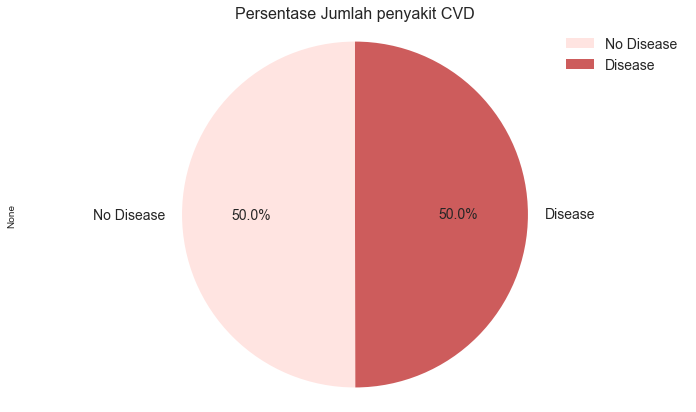

In [6]:
labels = ["No Disease", "Disease"]
colors = ["mistyrose","indianred"]
explode = (0, 0)
plt.figure(figsize=(12,7))
df.groupby(["cardio"]).size().plot.pie(explode=explode, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors, textprops= {'fontsize': 14})
plt.legend(loc="best", fontsize=14)
plt.title("Persentase Jumlah penyakit CVD", fontsize=16)
plt.axis("equal")
plt.savefig("CVD Disease Percentage (Pie Chart).png")
plt.show()

In [7]:
# Dimensi data (rows, columns)
df.shape

(70000, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Berdasarkan keterangan diatas, diketahui bahwa dataset ini terdiri dari 70000 baris dan 13 kolom. Semua kolom memiliki tipe data numerik, dimana 12 kolom memiliki tipe data integer dan 1 kolom memiiliki tipe data float.

# Data Cleaning

Bagian ini berisi proses penyiapan data berupa *data cleaning* sebelum dilakukan eksplorasi data lebih lanjut. Proses ini bertujuan untuk melihat apakah dataset tersebut terdapat nilai yang hilang (*missing value*), nilai yang tidak signifikan satu sama lain, dan melihat apakah ada duplikasi pada keseluruhan data.

Menghapus kolom "id" karena tidak dibutuhkan

In [9]:
df.drop("id", axis=1, inplace=True)

Memeriksa duplikasi pada data

In [10]:
print("Data Duplikat:", df.duplicated().sum(), "baris")

Data Duplikat: 24 baris


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# Memeriksa kembali duplikasi data
print("Data Duplikat:", df.duplicated().sum(), "baris")

Data Duplikat: 0 baris


Berdasarkan hasil diatas, terdapat duplikasi data berjumlah 24 data. Selanjutnya data ini akan di hapus menggunakan fungsi "drop_duplicates"

Memeriksa nilai yang hilang pada data

In [13]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Mengganti nama kolom

In [14]:
df.rename(columns={"ap_hi":"systolic", 
                   "ap_lo":"diastolic",
                   "gluc":"glucose",
                   "alco":"alcohol",
                   "cardio":"target"}, inplace=True)

In [15]:
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Konversi kolom "age", dari hari menjadi tahun dengan melakukan operasi pembagian. Dan menggunakan Fungsi round() untuk membulatkan data, terdiri dari 2 paramater (number & ndigits)


In [16]:
df["age"] = (df["age"]/365).round().astype("int")

Melakukan operasi pengurangan pada kolom "gender" (0 = Female; 1 = Male)

In [17]:
df["gender"] = (df["gender"]-1).astype("int")

In [18]:
# Dimensi Data (rows, columns)
df.shape

(69976, 12)

Setelah dilakukannya penghapusan data duplikat, jumlah data yang sebelumnya 70000 baris menjadi 69976 baris.

In [19]:
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,52,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,48,0,156,56.0,100,60,1,1,0,0,0,0


# Data Exploration

Proses *Data Exploration* dilakukan untuk memahami data lebih dalam, mengetahui variabel/atribut apa saja yang diduga berpengaruh dalam prediksi variabel targetnya, dan memeriksa statistik deskriptif serta deskripsinya untuk kepentingan prediksi model.

## Correlation of all columns

In [20]:
## Memeriksa Koefisien Korelasi antar kolom
df.corr()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
age,1.000000,-0.022971,-0.081483,0.053672,0.020794,0.017753,0.154392,0.098595,-0.047903,-0.029931,-0.009810,0.237778
gender,-0.022971,1.000000,0.499080,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037
height,-0.081483,0.499080,1.000000,0.290983,0.005488,0.006151,-0.050225,-0.018592,0.188003,0.094425,-0.006569,-0.010871
weight,0.053672,0.155320,0.290983,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599
systolic,0.020794,0.005996,0.005488,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475
diastolic,0.017753,0.015241,0.006151,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717
cholesterol,0.154392,-0.035915,-0.050225,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119
glucose,0.098595,-0.020558,-0.018592,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268
smoke,-0.047903,0.338131,0.188003,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533
alcohol,-0.029931,0.170950,0.094425,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366


Memeriksa korelasi menggunakan heatmap

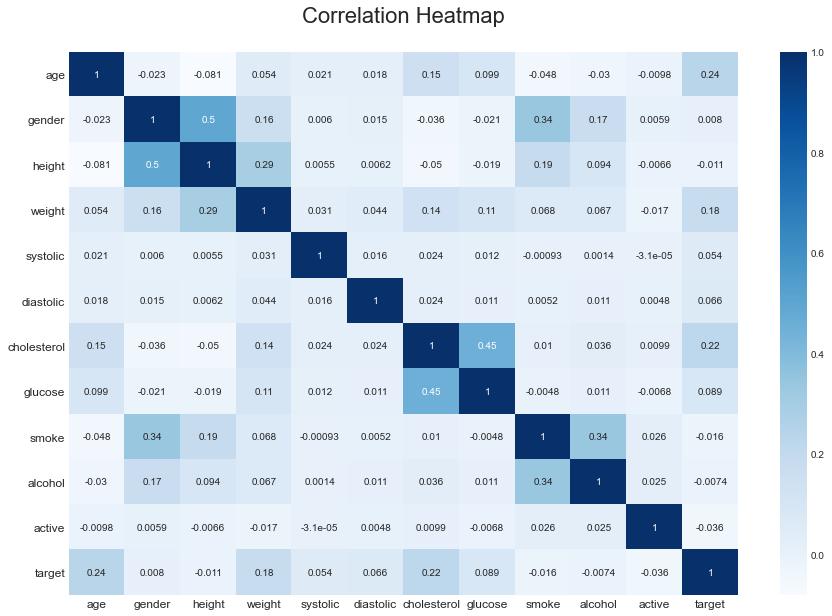

In [21]:
plt.figure(figsize = (15,10))
ax = sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.title("Correlation Heatmap\n", fontsize = 22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Correlation Heatmap.png")
plt.show()

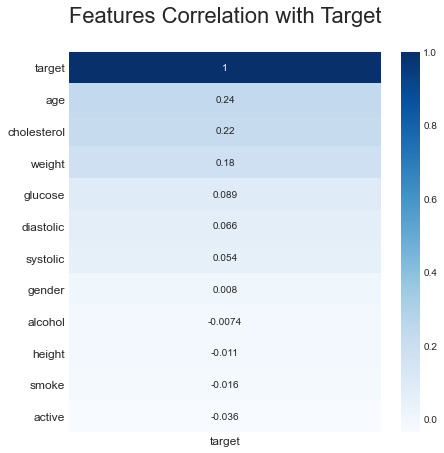

In [22]:
# Plot variabel yang berhubungan dengan variabel target 
plt.figure(figsize=(7, 7))
ax = sns.heatmap(df.corr()[["target"]].sort_values(by = "target", ascending=False), annot=True, cmap="Blues")
plt.title("Features Correlation with Target\n", fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Berdasarkan visualisasi diatas, terlihat bahwa `age`, `cholesterol`, dan `weight` memiliki korelasi yang signifikan dengan variabel prediksi (`target`)

## Descriptive Statistic

Melihat rangkuman statistik

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69976.0,53.338945,6.765633,30.0,48.0,54.0,58.0,65.0
gender,69976.0,0.349648,0.476862,0.0,0.0,0.0,1.0,1.0
height,69976.0,164.359152,8.211218,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.208519,14.397211,10.0,65.0,72.0,82.0,200.0
systolic,69976.0,128.820453,154.037729,-150.0,120.0,120.0,140.0,16020.0
diastolic,69976.0,96.636261,188.504581,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.366997,0.680333,1.0,1.0,1.0,2.0,3.0
glucose,69976.0,1.226535,0.572353,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.088159,0.283528,0.0,0.0,0.0,0.0,1.0
alcohol,69976.0,0.053790,0.225604,0.0,0.0,0.0,0.0,1.0


Berdasarkan rangkuman nilai statistik di atas, dapat diketahui bahwa terdapat outlier pada data, seperti:
- nilai minimal pada weight (berat badan) terdapat nilai 10 kg, dengan age (usia) 30 tahun dan height (tinggi badan) 55 cm
- nilai minimal pada systolic (tekanan darah sistolik) terdapat nilai -150 mmHg
- nilai minimal pada diastolic (tekanan darah diastolik) terdapat nilai -70 mmHg

## Statistical Distribution

<AxesSubplot:>

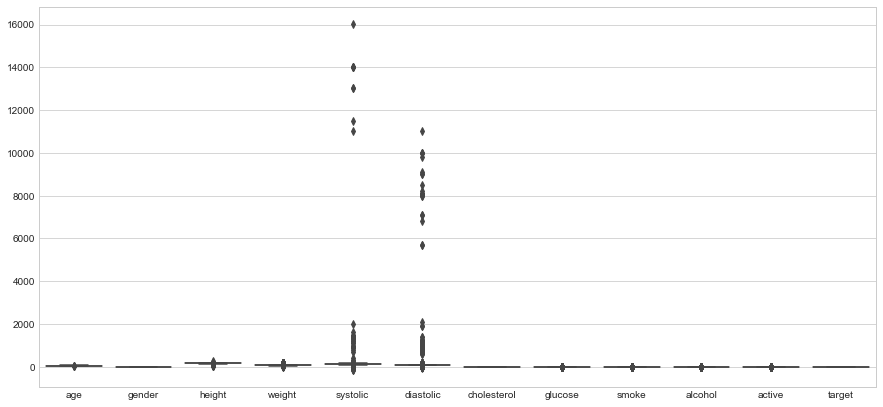

In [24]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df)

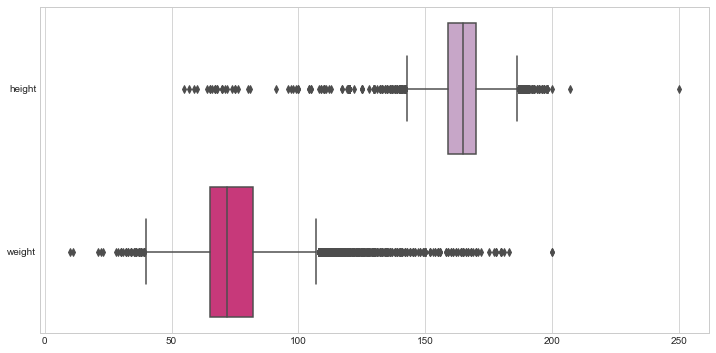

In [25]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df[["height", "weight"]], palette="PuRd", orient="h")

In [26]:
# Membuat fungsi untuk memunculkan histogram dan boxplot masing-masing kolom
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1,3,1)
    feature.plot(kind="hist")
    plt.title(f'{feature.name}')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = "--", color = "green", )
    plt.axvline(sigma, linestyle = "--", color = "red")
    plt.title(f'{feature.name} distribution')
    
    plt.subplot(1, 3, 3)
    feature.plot(kind = 'box')
    plt.title(f"{feature.name}")
    plt.show()

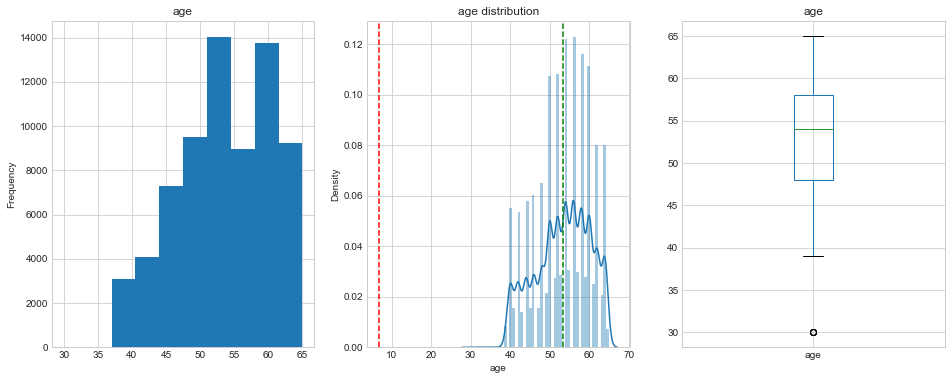

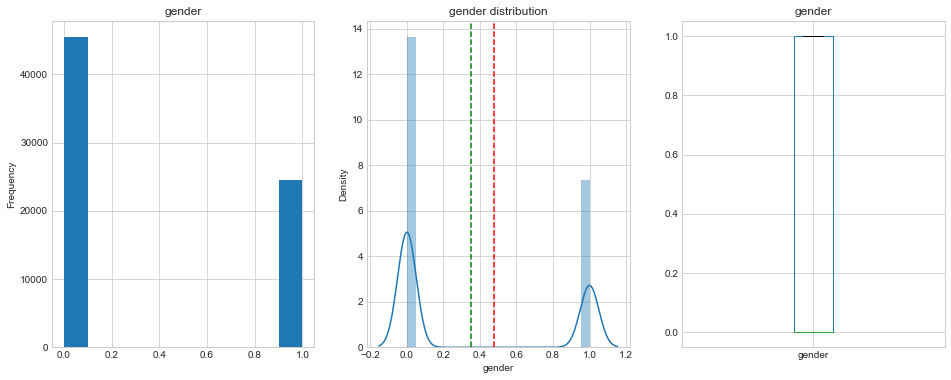

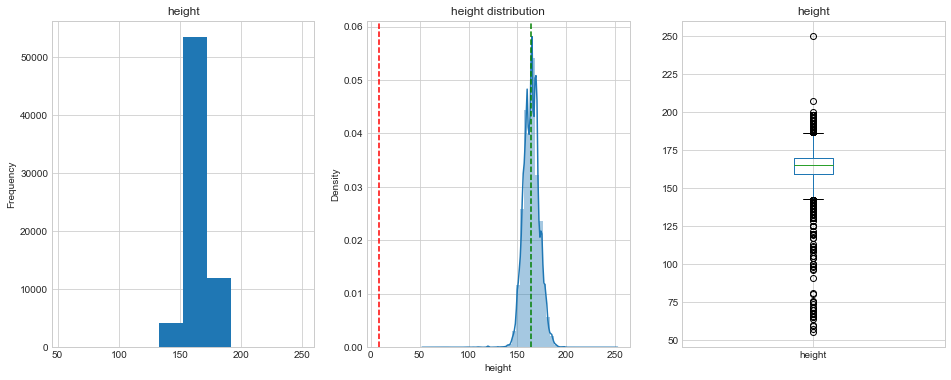

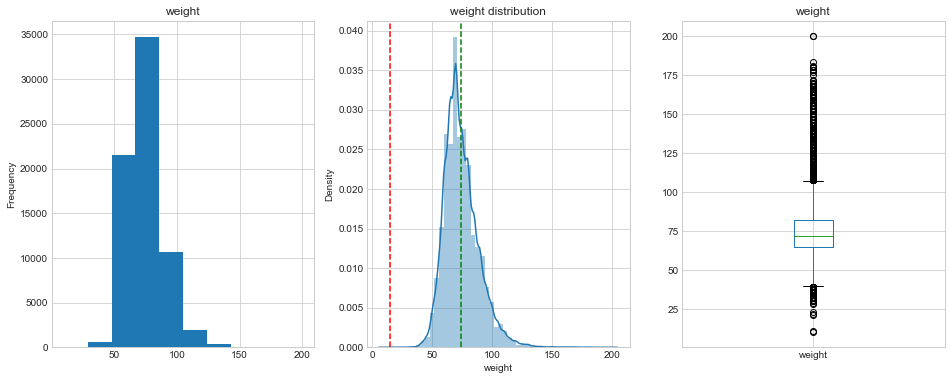

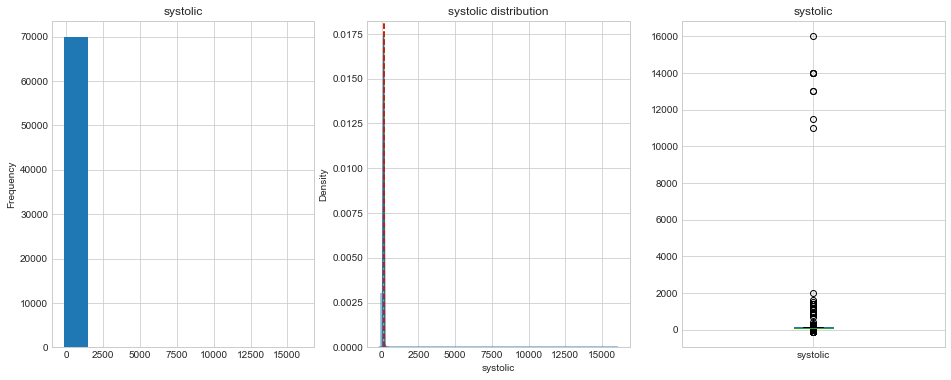

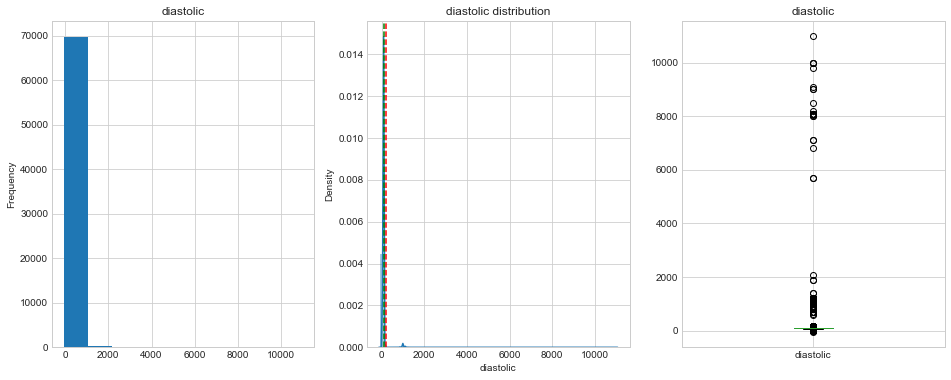

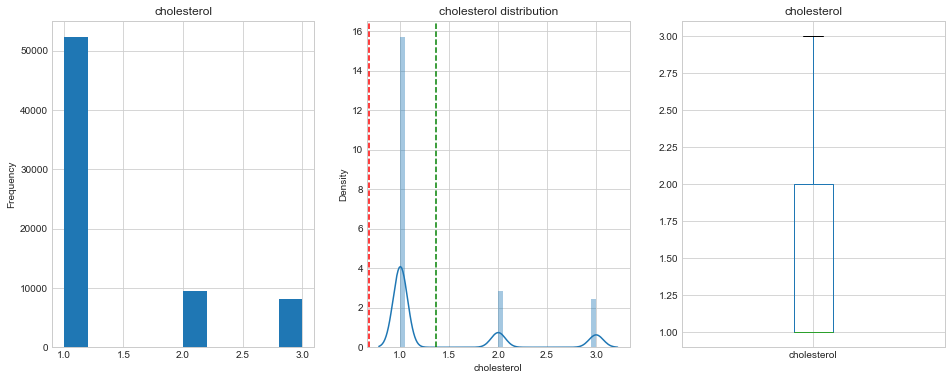

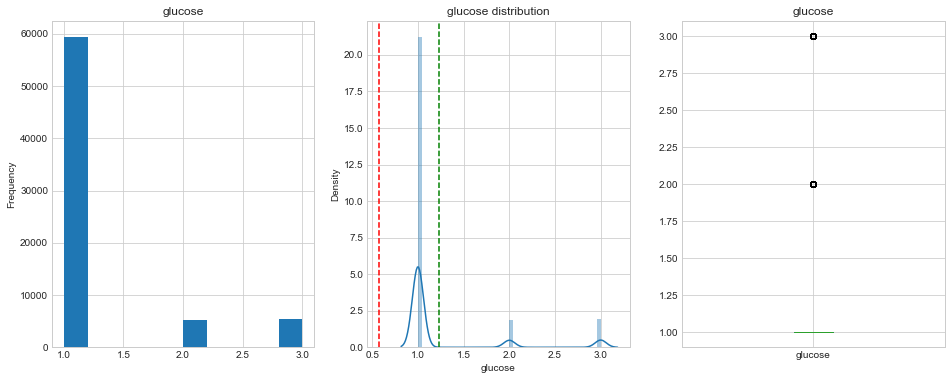

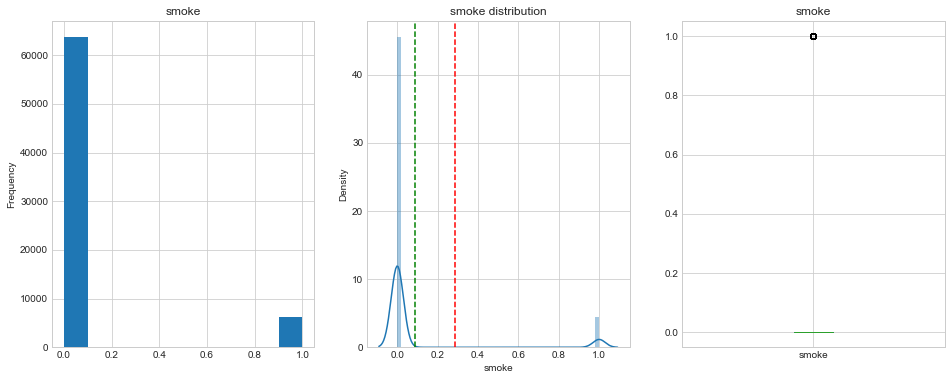

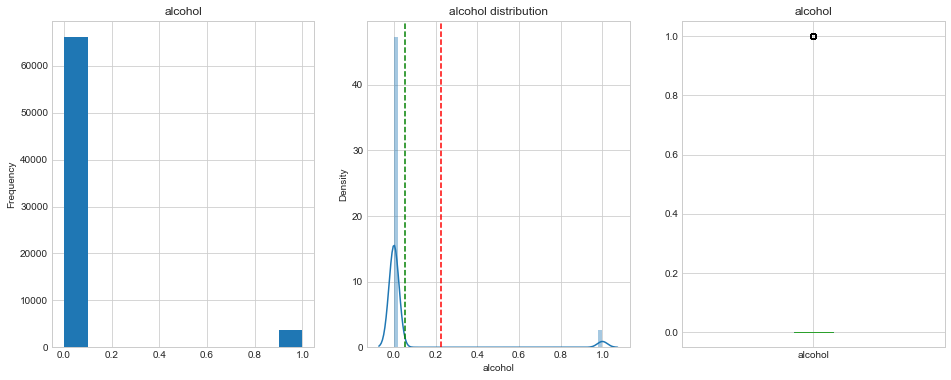

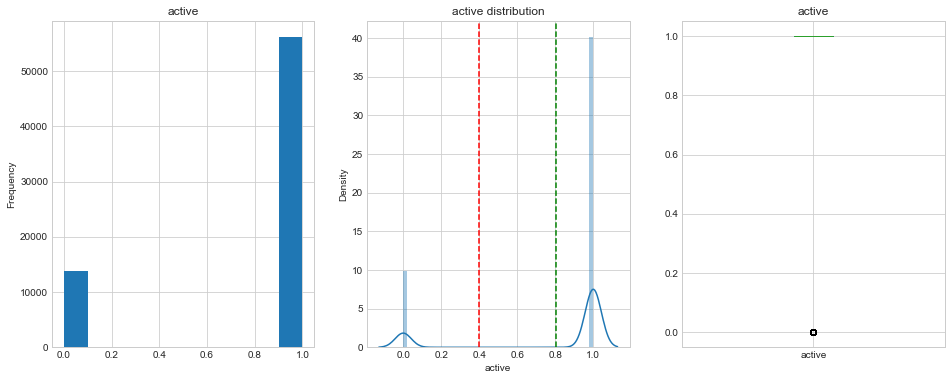

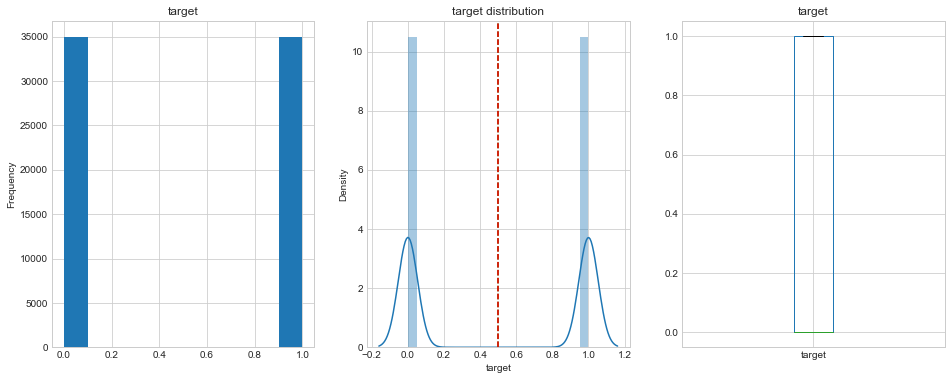

In [27]:
for i in df.columns:
    feat_plot(df[i])

## Nilai unik masing-masing kolom

In [28]:
column = [["target", "age", "gender", "height", "weight", "systolic", "diastolic", "cholesterol", "glucose", "smoke", "alcohol", "active"]]
for column in  df.columns:
    print("Unique value %s: \n %s \n" % (column, df[column].unique()))

Unique value age: 
 [50 55 52 48 60 61 62 54 41 40 46 58 59 63 64 57 56 49 51 44 65 45 53 47
 42 39 43 30] 

Unique value gender: 
 [1 0] 

Unique value height: 
 [168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182  76 149 142 150 144 147 186 146 141 195 140 198 145 143 196 138
 194 190 134 136 100 120 189 137 192 122 250 191 117  70  97 119 130 110
 193  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64
  91  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99
  57] 

Unique value weight: 
 [ 62.    85.    64.    82.    56.    67.    93.    95.    71.    68.
  80.    60.    78.   112.    75.    52.    83.    69.    90.    45.
  65.    59.    66.    74.   105.    73.    55.    70.    72.    63.
  50.   107.    84.    77.    79.    76.    58.   115.    97.    53.
  57.    49.   110.    94.    92.    87.   103.    88.    99.   100.
  61.    48.    54.    

Berdasarkan hasil di atas, menunjukkan adanya outlier pada data. Hal tersebut dapat membuat analisis terhadap data menjadi bias. maka dari itu, perlu dilakukan penghapusan outlier terhadap data. Pada analisis ini, penanganan outlier dilakukan dengan menggunakan manual dan lower & upper fences untuk melepaskan elemen luar.

---

## `bmi`

Untuk menghilangkan nilai yang tidak normal pada variabel `weight` dan `height`, dapat dilihat berdasarkan tingkat BMI (Body Mass Index) seseorang. Maka dari itu diperlukan variabel baru yaitu `bmi`. BMI (Body Mass Index) atau Indeks Masa Tubuh adalah perhitungan mudah yang dapat memberikan informasi dasar mengenai lemak tubuh manusia berdasarkan berat badan dan tinggi. BMI membandingkan berat badan (weight) dengan tinggi badan (height), dihitung dengan berat badan (kg) dibagi dengan kuadrat tinggi badan (m2).

Status BMI:

- di bawah 18.5 = Berat badan kurang
- 18.5-24.9 = Berat badan normal
- 25.0-29.9 = Pra obesitas
- 30.0-34.9 = Obesitas kelas I
- 35.0-39.9 = Obesitas kelas II
- di atas 40 = Obesitas kelas III

sumber: https://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi

Membuat variabel "bmi" untuk memudahkan melihat record yang tidak normal

In [29]:
weight = df["weight"]
height = df["height"]
df["bmi"] = round(weight/(height/100)**2, 1)

print("Nilai BMI Terendah: {}".format(df["bmi"].min()))
print("Nilai BMI Tertinggi: {}".format(df["bmi"].max()))

Nilai BMI Terendah: 3.5
Nilai BMI Tertinggi: 298.7


In [30]:
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.9
2,52,0,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.7
4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.0


BMI -  Menggunakan lower & upper fences untuk melepaskan elemen luar

In [31]:
bmi = df["bmi"]
Q1 = pd.DataFrame(bmi).quantile(0.25)[0] # Persentile ke-25
Q3 =  pd.DataFrame(bmi).quantile(0.75)[0] # Persentile ke-75
IQR = Q3 - Q1 # Rentang Interquartile

lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
print("Lower Fence = {}\nUpper Fence = {}".format(lower_fence, upper_fence))

# "Outside" boxplot 
outside = bmi[(bmi < lower_fence) | (bmi > upper_fence)]
print("Outside = {}".format(outside.shape[0]))

# "Inside" boxplot
inside = bmi[(bmi >= lower_fence) & (bmi <= upper_fence)]
print("Inside = {}".format(inside.shape[0]))

Lower Fence = 14.449999999999998
Upper Fence = 39.65
Outside = 2034
Inside = 67942


Menghilangkan data tidak normal

In [32]:
df = df[(df["bmi"] >= lower_fence ) & (df["bmi"] <= upper_fence)]
print(df.shape)

(67942, 13)


<AxesSubplot:xlabel='bmi'>

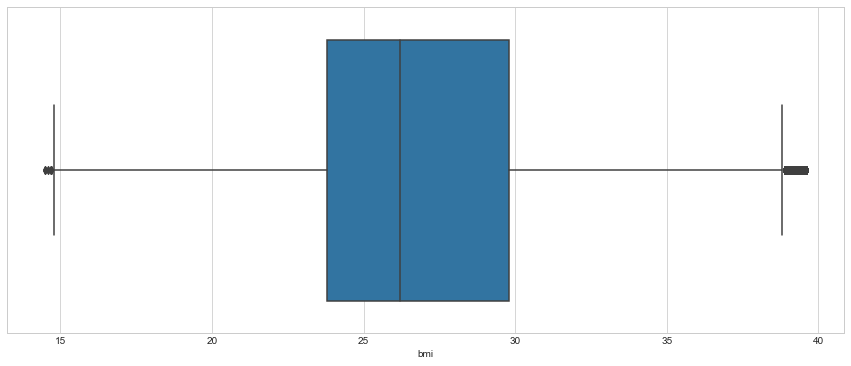

In [33]:
# Boxplot - BMI
plt.figure(figsize=(15,6))
sns.boxplot(bmi[(bmi >= lower_fence) & (bmi <= upper_fence)])

In [34]:
# Nilai outside BMI berdasarkan perhitungan diatas
outside.unique()

array([ 43.7,  40.8,  47.6,  40.3,  40. ,  95.2,  41.3,  42.2,  39.8,
        40.6,  57.6,  62.1,  40.1,  57.8,  51.3,  41.1,  50.9,  46.5,
        39.9,  42.3,  44.5,  53.7,  43.8,  47.7,  43.1,  50.5,  46.4,
        41.5,  47.2,  47.5,  41.8,  49. ,  47.8,  44.1,  47.1,  41.6,
        40.5,  58.6,  39.7,  42.1,  45.2,  41.9,  43.5,  41.4,  43. ,
        47.4,  43.6,  44.4,  46.9,  45.5,  47.3,  41.7,  52.4,  40.7,
        44.8,  42.7,  46.3,  42.5,  56.5,  65.3,  40.2,  42.9,  50.6,
        41.2,  51.1,  40.9,  49.1,  44.9,  64.5,  43.3,  49.5,  62.9,
        70. ,  54. ,  48.9,  48.6,  55. ,  46. ,  43.4,  48.4,  42.8,
        46.1,  55.6,  55.4,  58.1,  41. ,  49.7,  44.6,  47. ,  42.6,
        40.4,  44.3,  43.2,  43.9,  46.6,  56.1,  59.3,  48.7, 108.2,
        48.8,  13.8,  44. ,  52.5,  45.9,  57. ,  50. ,  46.7,  49.3,
       146.9, 180.7,  57.1,  52.1,  62.8,  46.2,  54.7,  53. ,  45. ,
        48.3,  52.6,  13.5,  50.2,  53.3,  45.4,  45.6,  48.1,  74.4,
        47.9,  56.2,

Berdasarkan hasil di atas, menunjukkan bahwa jumlah dataset diatas menjadi 67942 baris.

In [35]:
from scipy.stats import skew
import numpy as np

# skewness along the index axis
df.skew(axis = 0, skipna = True)

age            -0.301417
gender          0.602058
height          0.118010
weight          0.517097
systolic       88.866800
diastolic      32.225523
cholesterol     1.619042
glucose         2.438207
smoke           2.883316
alcohol         3.959393
active         -1.536902
target          0.024376
bmi             0.566192
dtype: float64

## `height`

In [36]:
# Menampilkan record dari "height" (tinggi badan pasien)
min_height = df["height"].min()
max_height = df["height"].max()
print("Tinggi Badan terendah pasien: {}".format(min_height))
print("Tinggi Badan tertinggi pasien: {}".format(max_height))

Tinggi Badan terendah pasien: 120
Tinggi Badan tertinggi pasien: 207


## `weight`

In [37]:
# Menampilkan record dari "weight" (berat badan pasien)
min_weight = df["weight"].min()
max_weight = df["weight"].max()
print("Berat Badan terendah pasien: {}".format(min_weight))
print("Berat Badan tertinggi pasien: {}".format(max_weight))

Berat Badan terendah pasien: 28.0
Berat Badan tertinggi pasien: 135.0


## `systolic` & `diastolic`

In [38]:
syst = df["height"]
#uji normalitas (shapiro wilk)
stat, p = stats.shapiro(syst)
stat, p

(0.99593585729599, 4.1739125384084946e-37)

In [39]:
#uji normalitas (jarque bera)
stat, p = stats.jarque_bera(syst)
stat, p

(256.07074321405327, 0.0)

In [40]:
# Menampilkan dataframe pada nilai systolic/diastolic yang tergolong tidak normal/diperkirakan terdapat kesalahan pada saat input data
df[(df["systolic"] < df["diastolic"])]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,bmi
228,48,1,183,98.0,160,1100,1,2,1,0,1,1,29.3
241,60,1,157,60.0,160,1000,2,1,0,0,0,1,24.3
260,50,0,150,83.0,140,800,1,1,0,0,1,1,36.9
329,64,0,176,63.0,160,1000,2,2,0,0,0,1,20.3
345,51,0,154,81.0,140,1000,2,1,0,0,1,1,34.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,64,0,167,81.0,160,1000,1,1,0,0,1,1,29.0
69872,60,0,152,56.0,160,1000,1,1,0,0,1,1,24.2
69878,58,1,168,95.0,160,1000,1,1,0,0,1,1,33.7
69885,61,1,166,78.0,170,1000,1,1,0,0,0,0,28.3


Menghapus data tidak normal/tidak semestinya, dimana nilai systolic memiliki nilai yang lebih tinggi dibandingkan diastolic

In [41]:
df = df[(df["systolic"] > df["diastolic"])]

In [42]:
df.shape

(66783, 13)

 Systolic -  Menggunakan lower & upper fences untuk melepaskan elemen luar

In [43]:
systolic = df["systolic"]
Q1 = pd.DataFrame(systolic).quantile(0.25)[0] # Persentile ke-25
Q3 =  pd.DataFrame(systolic).quantile(0.75)[0] # Persentile ke-75
IQR = Q3 - Q1 # Rentang Interquartile

lower_fence = Q1 - (3 * IQR)
upper_fence = Q3 + (3 * IQR)
print("Lower Fence = {} \nUpper Fence = {}".format(lower_fence, upper_fence))

# "Outside" boxplot 
outside = systolic[(systolic < lower_fence) | (systolic > upper_fence)]
print("Outside = {} baris".format(outside.shape[0]))

# "Inside" boxplot
inside = systolic[(systolic >= lower_fence) & (systolic <= upper_fence)]
print("Inside = {} baris".format(inside.shape[0]))

Lower Fence = 60.0 
Upper Fence = 200.0
Outside = 90 baris
Inside = 66693 baris


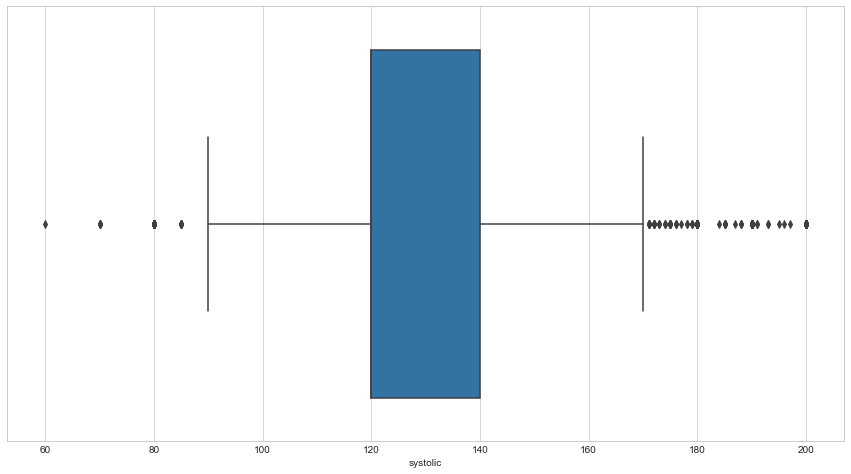

In [44]:
# Boxplot 
plt.figure(figsize=(15, 8))
ax = sns.boxplot(systolic[(systolic >= lower_fence) & (systolic <= upper_fence)])

In [45]:
# Nilai outside systolic berdasarkan perhitungan di atas
outside.unique()

array([  220,   902,   906,   909, 11500,  1420,   210,   701,  1500,
         202,   907,    12, 14020,  1400,   240,    16,  1620,  1130,
         309,   401, 16020,  1202,   806,  1300,   230,   215,  1409,
       11020,    13,    24,   960, 13010,  1110,    15,  1205,  2000],
      dtype=int64)

menghilangkan nilai tidak normaal

In [46]:
df = df[(df["systolic"] >= lower_fence) & (df["systolic"] <= upper_fence)]

In [47]:
# Dimensi data (rows, columns)
df.shape

(66693, 13)

diastolic -  Menggunakan lower & upper fences untuk melepaskan elemen luar

In [48]:
diastolic = df["diastolic"]
Q1 = pd.DataFrame(diastolic).quantile(0.25)[0] # Persentile ke-25
Q3 =  pd.DataFrame(diastolic).quantile(0.75)[0] # Persentile ke-75
IQR = Q3 - Q1 # Rentang Interquartile

lower_fence = Q1 - (3 * IQR)
upper_fence = Q3 + (3 * IQR)
print("Lower Fonce = {} \nUpper Fence = {}".format(lower_fence, upper_fence))

# "Outside" boxplot 
outside = diastolic[(diastolic < lower_fence) | (diastolic > upper_fence)]
print("Outside = {} baris".format(outside.shape[0]))

# "Inside" boxplot
inside = diastolic[(diastolic >= lower_fence) & (diastolic <= upper_fence)]
print("Inside = {} baris".format(inside.shape[0]))

Lower Fonce = 50.0 
Upper Fence = 120.0
Outside = 90 baris
Inside = 66603 baris


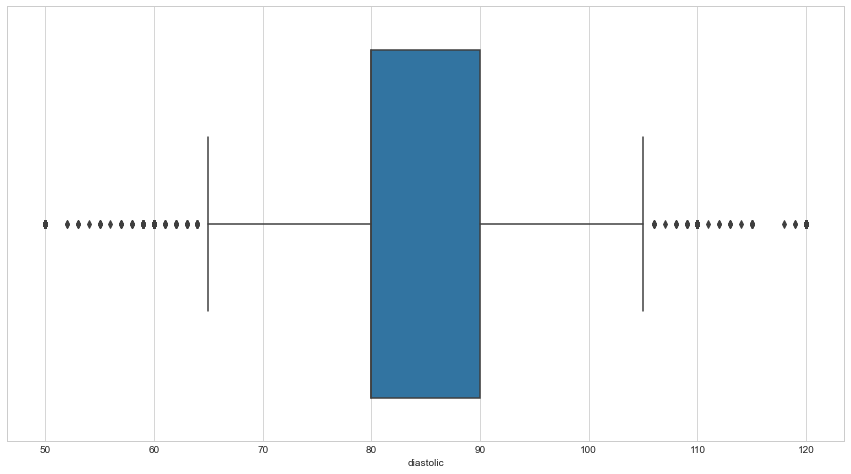

In [49]:
# Boxplot 
plt.figure(figsize=(15, 8))
ax = sns.boxplot(diastolic[(diastolic >= lower_fence) & (diastolic <= upper_fence)])

In [50]:
# Nilai outside diastolic berdasarkan perhitungan di atas
outside.unique()

array([ 30,  40, 170,  10, 130,  20,   0, 140,  45,   7, 150, 121,   6,
         1, 182,   9, 180, 122, 160,  15, 126, 125,  49], dtype=int64)

Menghilangkan data tidak normal

In [51]:
df = df[(df["diastolic"] >= lower_fence) & (df["diastolic"] <= upper_fence)]

In [52]:
# Dimensi data (rows, columns)
df.shape

(66603, 13)

In [53]:
df[df["systolic"] <= 120]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,22.0
4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.0
5,60,0,151,67.0,120,80,2,2,0,0,0,0,29.4
8,48,0,158,71.0,110,70,1,1,0,0,1,0,28.4
9,54,0,164,68.0,110,60,1,1,0,0,0,0,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69988,60,0,160,59.0,110,70,1,1,0,0,1,0,23.0
69989,58,0,157,83.0,120,70,1,1,0,0,1,1,33.7
69990,41,0,168,72.0,110,70,1,1,0,0,1,1,25.5
69995,53,1,168,76.0,120,80,1,1,1,0,1,0,26.9


In [54]:
indexName = df[(df["target"] == 1) & (df["systolic"] <= 120)].index
df.drop(indexName, inplace=True)

In [55]:
df.shape

(54115, 13)

In [56]:
df[df["systolic"] <= 120]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,22.0
4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.0
5,60,0,151,67.0,120,80,2,2,0,0,0,0,29.4
8,48,0,158,71.0,110,70,1,1,0,0,1,0,28.4
9,54,0,164,68.0,110,60,1,1,0,0,0,0,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69986,50,1,180,78.0,120,80,1,1,0,0,1,0,24.1
69987,52,0,151,49.0,120,80,1,1,0,0,1,0,21.5
69988,60,0,160,59.0,110,70,1,1,0,0,1,0,23.0
69995,53,1,168,76.0,120,80,1,1,1,0,1,0,26.9


## `age`

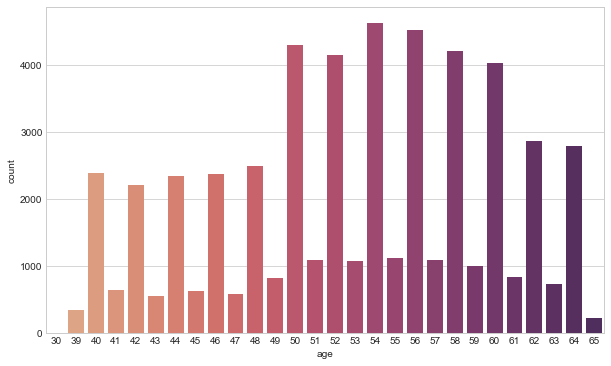

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(df["age"], palette="flare")
plt.show()

Text(0, 0.5, 'Number of Patients')

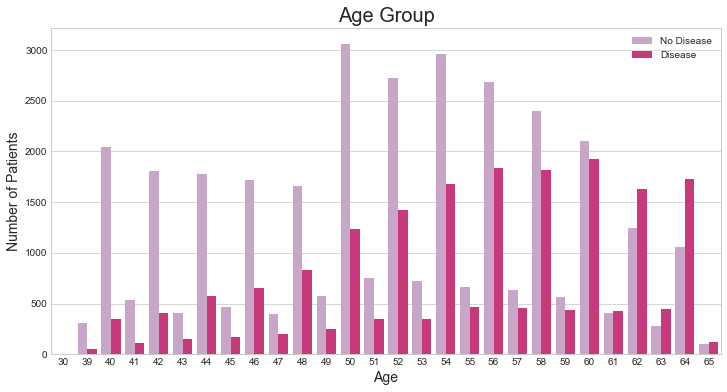

In [58]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = "age", hue = "target", data = df, palette = "PuRd")
plt.legend(["No Disease", "Disease"])
plt.title("Age Group", fontsize = 20)
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Number of Patients", fontsize = 14)


Berdasarkan plot diatas, rentang usia pasien ialah 30 hingga 65 tahun. Pasien wanita memiliki risiko penyakit *cardiovascular* lebih tinggi di banding pria, yang berada pada usia sekitar 60 tahun.

## `gender`

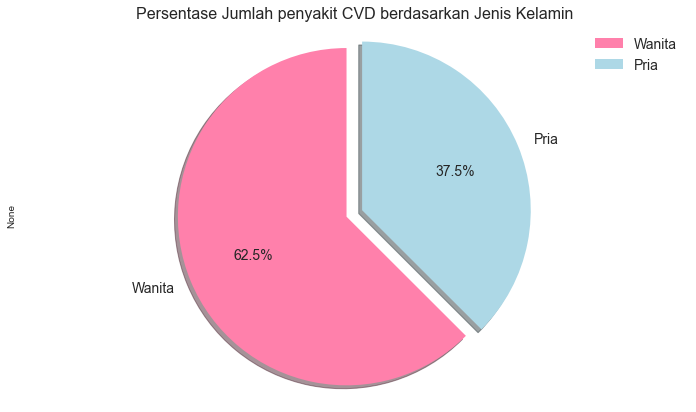

In [59]:
disease = df[df["target"] == 1]

labels = ["Wanita", "Pria"]
colors = ["#ff80ab","#ADD8E6"]
explode = (0, 0.1)
plt.figure(figsize=(12,7))
disease.groupby(["gender"]).size().plot.pie(explode=explode, labels=labels, shadow=True, autopct="%1.1f%%", startangle=90, colors=colors, textprops= {'fontsize': 14})
plt.legend(loc="best", fontsize=14)
plt.title("Persentase Jumlah penyakit CVD berdasarkan Jenis Kelamin", fontsize=16)
plt.axis("equal")
plt.savefig("PieChart.png")
plt.show()

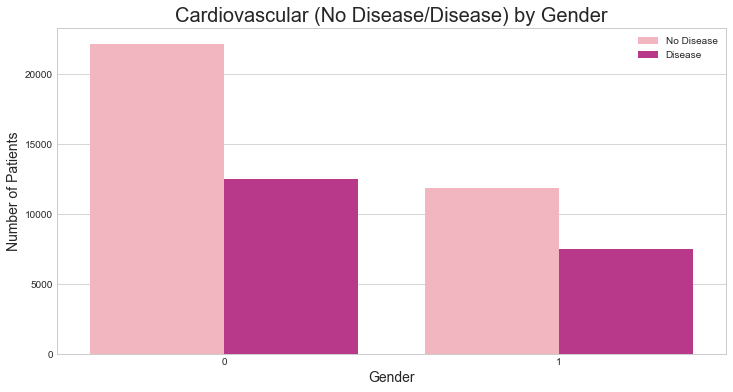

In [60]:
# Plot jumlah penyakit CVD berdasarkan jenis kelamin
plt.figure(figsize=(12, 6))
sns.countplot(x = "gender", hue = "target", data = df, palette = "RdPu")
plt.legend(["No Disease", "Disease"])
plt.title("Cardiovascular (No Disease/Disease) by Gender", fontsize = 20)
plt.xlabel("Gender", fontsize = 14)
plt.ylabel("Number of Patients", fontsize = 14)
plt.show()

Berdasarkan plot diatas, menunjukkan bahwa yang memiliki penyakit *cardiovascular* cenderung berjenis kelamin `wanita`

## `cholesterol`

In [61]:
df.groupby("cholesterol")[["target"]].size()

cholesterol
1    40919
2     7417
3     5779
dtype: int64

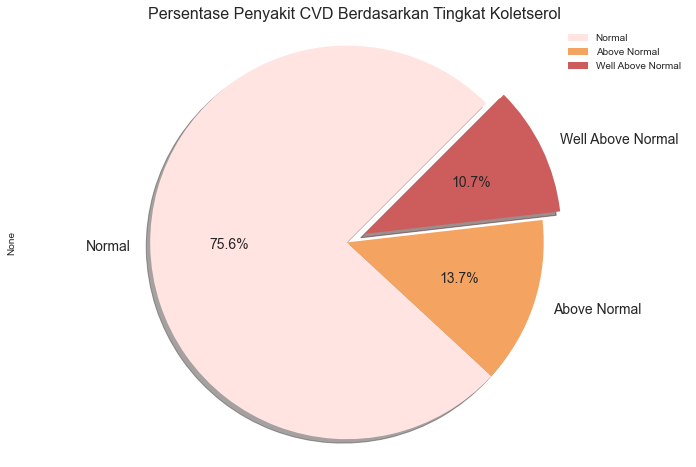

In [62]:
cholesterol_labels = ["Normal", "Above Normal", "Well Above Normal"]
colors = ["mistyrose","sandybrown", "indianred"]
explode = (0, 0, 0.1)
plt.figure(figsize=(12, 8))
df.groupby("cholesterol")[["target"]].size().plot.pie(explode=explode, labels=cholesterol_labels, shadow=True, autopct="%1.1f%%", startangle=45, colors=colors, textprops= {'fontsize': 14})
plt.title("Persentase Penyakit CVD Berdasarkan Tingkat Koletserol", fontsize=16)
plt.legend(loc="best")
plt.axis("equal")
plt.savefig("")
plt.show()

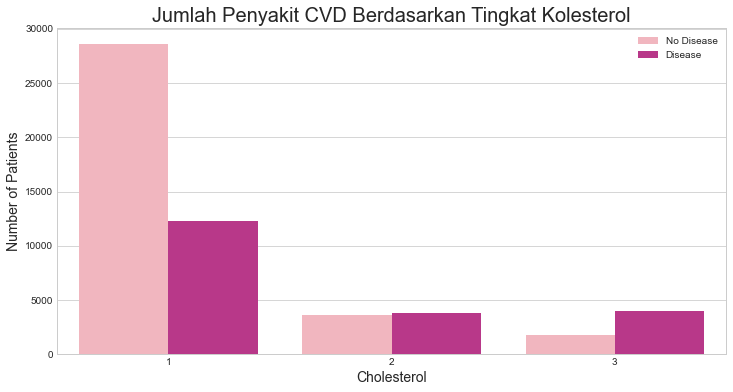

In [63]:
plt.figure(figsize = (12, 6))
sns.countplot(x = "cholesterol", hue = "target", data = df, palette = "RdPu")
plt.legend(["No Disease", "Disease"])
plt.title("Jumlah Penyakit CVD Berdasarkan Tingkat Kolesterol", fontsize = 20)
plt.xlabel("Cholesterol", fontsize = 14)
plt.ylabel("Number of Patients", fontsize = 14)
plt.savefig("Choletsterol")
plt.show()

Berdasarkan hasil diatas, terlihat bahwa jumlah pasien dengan tingkat kolesterol yang tinggi atau diatas normal cenderung lebih memiliki risiko penyakit kardiovaskular.

## `glucose`

In [64]:
df.groupby(["target", "glucose"]).size()

target  glucose
0       1          30133
        2           2006
        3           1915
1       1          16177
        2           1923
        3           1961
dtype: int64

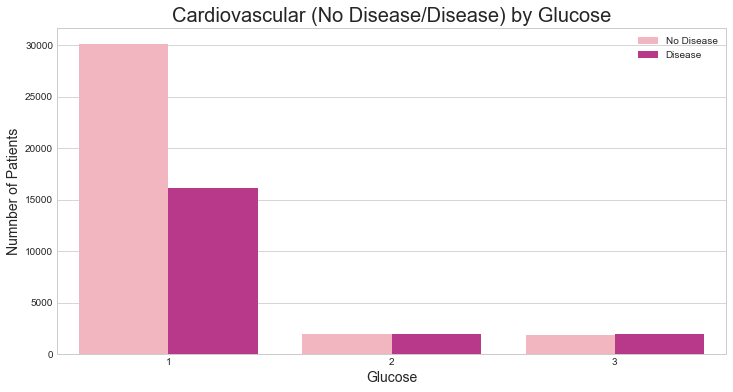

In [65]:
plt.figure(figsize = (12, 6))
sns.countplot(x = "glucose", hue = "target", data = df, palette = "RdPu")
plt.legend(["No Disease", "Disease"])
plt.title("Cardiovascular (No Disease/Disease) by Glucose", fontsize = 20)
plt.xlabel("Glucose", fontsize = 14)
plt.ylabel("Numnber of Patients", fontsize = 14)
plt.show()

Berdasarkan hasil diatas, terlihat bahwa jumlah pasien dengan tingkat glukosa yang tinggi atau diatas normal cenderung lebih memiliki risiko penyakit kardiovaskular.

## `smoke`

In [66]:
df.groupby(["target", "smoke"]).size()

target  smoke
0       0        30877
        1         3177
1       0        18130
        1         1931
dtype: int64

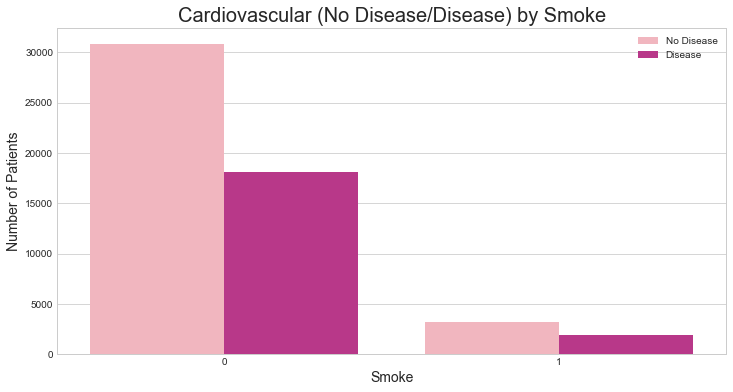

In [67]:
plt.figure(figsize = (12, 6))
sns.countplot(x = "smoke", hue = "target", data = df, palette = "RdPu")
plt.legend(["No Disease", "Disease"])
plt.title("Cardiovascular (No Disease/Disease) by Smoke", fontsize = 20)
plt.xlabel("Smoke", fontsize = 14)
plt.ylabel("Number of Patients", fontsize = 14)
plt.show()

Berdasarkan hasil diatas, terlihat bahwa jumlah pasien perokok cenderung lebih tidak memiliki risiko penyakit kardiovaskular. yang berarti, pasien dengan memiliki risiko penyakit kardiovaskular cenderung tidak merokok.

## `alco`

In [68]:
# Jumlah nilai Unik pada variabel "alco" (asupan alkohol pasien)

df.groupby(["target", "alcohol"]).size()

target  alcohol
0       0          32171
        1           1883
1       0          18837
        1           1224
dtype: int64

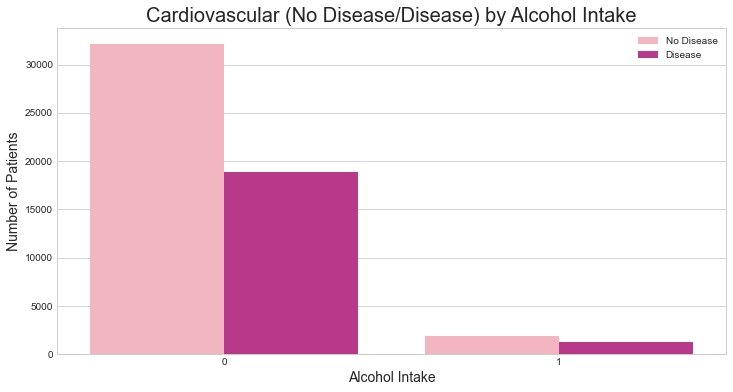

In [69]:
plt.figure(figsize = (12, 6))
sns.countplot(x = "alcohol", hue = "target", data = df, palette = "RdPu")
plt.legend(["No Disease", "Disease"])
plt.title("Cardiovascular (No Disease/Disease) by Alcohol Intake", fontsize = 20)
plt.xlabel("Alcohol Intake", fontsize = 14)
plt.ylabel("Number of Patients", fontsize = 14)
plt.show()

Berdasarkan hasil diatas, terlihat bahwa pasien yang tidak mengkonsumsi alkohol lebih banyak dibandingkan dengan pasien yang mengkonsumsi alkohol. Adapun dengan pasien yang memiliki risiko penyakit kardiovaskular cenderung tidak mengkonsumsi alkohol.

## `active`

In [70]:
df.groupby(["target", "active"]).size()

target  active
0       0          6187
        1         27867
1       0          3951
        1         16110
dtype: int64

Berdasarkan hasil diatas,  

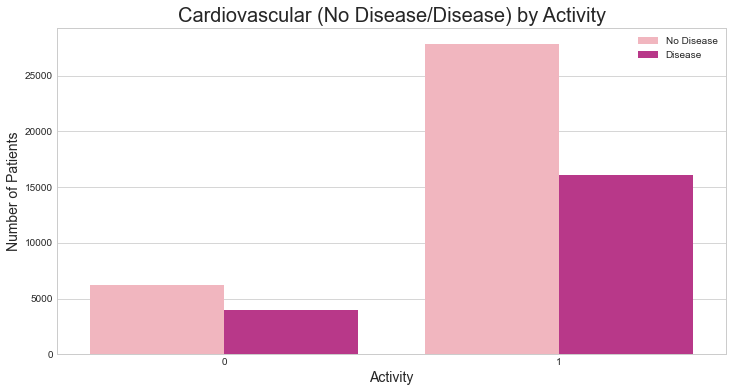

In [71]:
plt.figure(figsize = (12, 6))
sns.countplot(x = "active", hue="target", data=df, palette="RdPu")
plt.legend(["No Disease", "Disease"])
plt.title("Cardiovascular (No Disease/Disease) by Activity", fontsize = 20)
plt.xlabel("Activity", fontsize = 14)
plt.ylabel("Number of Patients", fontsize = 14)
plt.show()

## cardio/Target

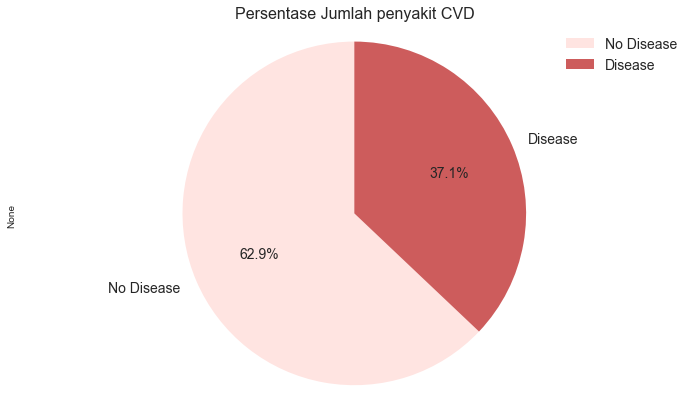

In [72]:
labels = ["No Disease", "Disease"]
colors = ["mistyrose","indianred"]
explode = (0, 0)
plt.figure(figsize=(12,7))
df.groupby(["target"]).size().plot.pie(explode=explode, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors, textprops= {'fontsize': 14})
plt.legend(loc="best", fontsize=14)
plt.title("Persentase Jumlah penyakit CVD", fontsize=16)
plt.axis("equal")
plt.savefig("CVD Disease Percentage (Pie Chart).png")
plt.show()

In [73]:
df.groupby(["target"]).size()

target
0    34054
1    20061
dtype: int64

In [74]:
df["target"].value_counts()

0    34054
1    20061
Name: target, dtype: int64

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,54115.0,52.966719,6.823788,30.0,48.0,54.0,58.0,65.0
gender,54115.0,0.358570,0.479585,0.0,0.0,0.0,1.0,1.0
height,54115.0,164.545191,7.850375,120.0,159.0,165.0,170.0,207.0
weight,54115.0,73.193503,12.897012,28.0,64.0,72.0,81.0,134.0
systolic,54115.0,128.417019,17.150017,70.0,120.0,120.0,140.0,200.0
diastolic,54115.0,81.921223,9.628552,50.0,80.0,80.0,90.0,120.0
cholesterol,54115.0,1.350642,0.664291,1.0,1.0,1.0,1.0,3.0
glucose,54115.0,1.215855,0.559033,1.0,1.0,1.0,1.0,3.0
smoke,54115.0,0.094392,0.292375,0.0,0.0,0.0,0.0,1.0
alcohol,54115.0,0.057415,0.232636,0.0,0.0,0.0,0.0,1.0


# Data Preprocessing

Proses *Data Preprocessing* dilakukan sebagai proses penyiapan data yang selanjutnya akan digunakan untuk proses pelatihan model prediksi klasifikasi.

In [76]:
data = df.copy()

In [77]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'systolic', 'diastolic',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'target',
       'bmi'],
      dtype='object')

In [78]:
#Memisahkan/memecah data
age = data["age"]
gender = data["gender"]
height = data["height"]
weight = data["weight"]
systolic = data["systolic"]
diastolic = data["diastolic"]
cholesterol = data["cholesterol"]
glucose = data["glucose"]
smoke = data["smoke"]
alcohol = data["alcohol"]
active = data["active"]
target = data["target"]
bmi = data["bmi"]

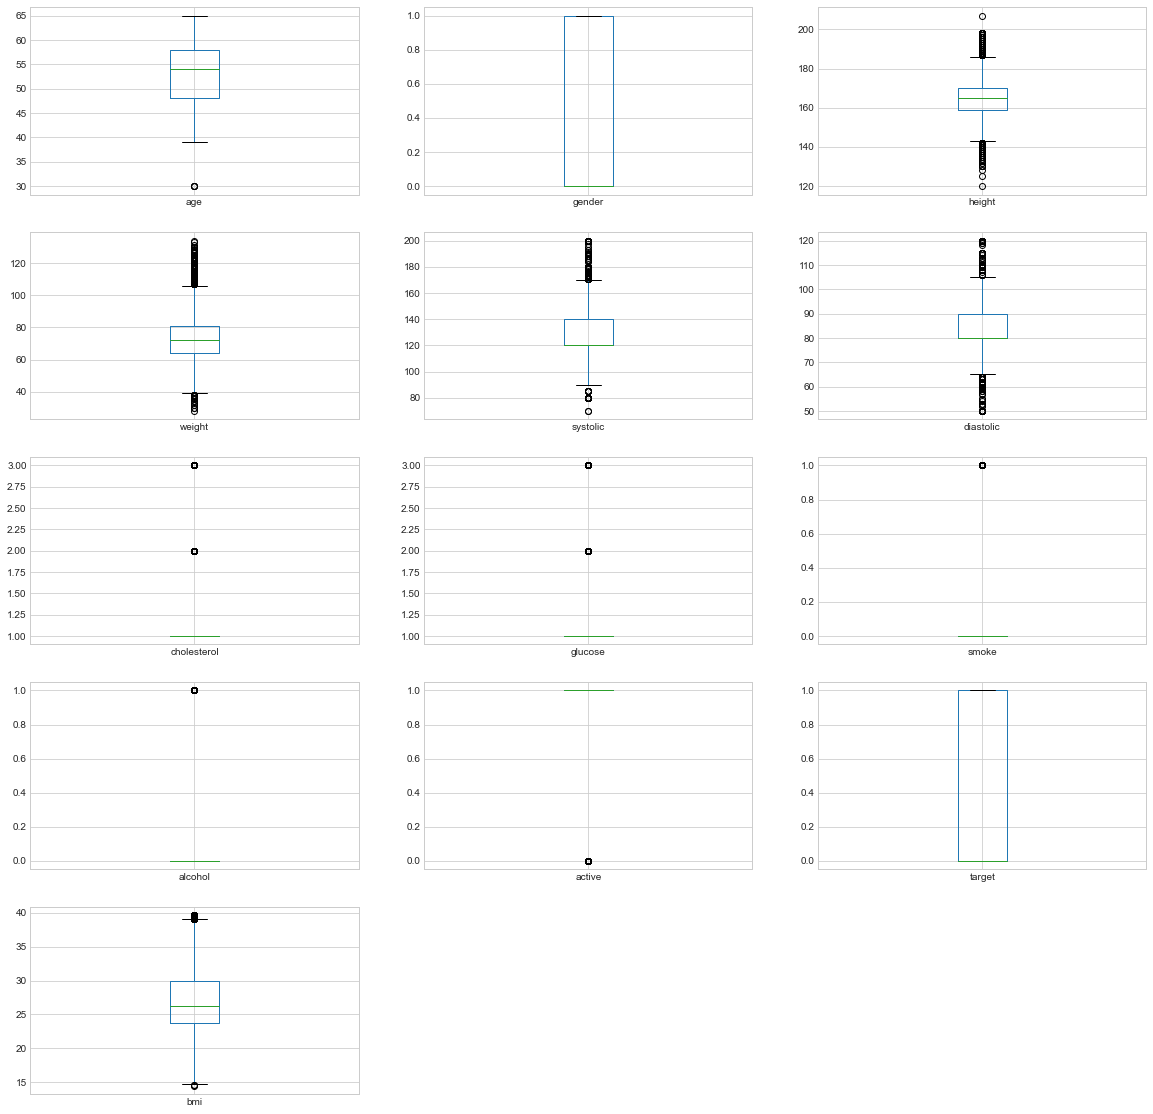

In [79]:
fig = plt.figure(figsize=(20,20))

ax0 = fig.add_subplot(5,3,1)
ax1 = fig.add_subplot(5,3,2)
ax2 = fig.add_subplot(5,3,3)
ax3 = fig.add_subplot(5,3,4)
ax4 = fig.add_subplot(5,3,5)
ax5 = fig.add_subplot(5,3,6)
ax6 = fig.add_subplot(5,3,7)
ax7 = fig.add_subplot(5,3,8)
ax8 = fig.add_subplot(5,3,9)
ax9 = fig.add_subplot(5,3,10)
ax10 = fig.add_subplot(5,3,11)
ax11 = fig.add_subplot(5,3,12)
ax12 = fig.add_subplot(5,3,13)

age.plot(kind="box", ax=ax0)
gender.plot(kind="box", ax=ax1)
height.plot(kind="box", ax=ax2)
weight.plot(kind="box", ax=ax3)
systolic.plot(kind="box", ax=ax4)
diastolic.plot(kind="box", ax=ax5)
cholesterol.plot(kind="box", ax=ax6)
glucose.plot(kind="box", ax=ax7)
smoke.plot(kind="box", ax=ax8)
alcohol.plot(kind="box", ax=ax9)
active.plot(kind="box", ax=ax10)
target.plot(kind="box", ax=ax11)
bmi.plot(kind="box", ax=ax12)

plt.show()

In [80]:
data

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.9
2,52,0,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.7
4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,58,0,165,80.0,150,80,1,1,0,0,1,1,29.4
69995,53,1,168,76.0,120,80,1,1,1,0,1,0,26.9
69997,52,1,183,105.0,180,90,3,1,0,1,0,1,31.4
69998,61,0,163,72.0,135,80,1,2,0,0,0,1,27.1


## Data Spltting

In [81]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = data.drop("target", axis=1) # Features
y = data["target"] # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [82]:
df_xtest = pd.DataFrame(X_test)
df_ytest = pd.DataFrame(y_test)
df_test = pd.concat([df_xtest, df_ytest], axis=1, join="inner")
df_test.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,bmi,target
50855,54,0,161,75.0,130,90,1,1,1,0,1,28.9,1
57646,54,0,173,84.0,120,80,1,1,0,0,0,28.1,0
902,39,0,166,64.0,110,70,1,1,0,0,1,23.2,0
40202,57,0,160,58.0,110,70,1,1,0,0,1,22.7,0
29309,50,0,172,95.0,150,90,1,1,0,0,1,32.1,1


## Data Standardization

Standarisasi data adalah proses mengubah data sedemikian rupa sehingga *mean* tiap variabel menjadi sama dengan nol dan *standard deviation* tiap variabel adalah satu. maka akan didapatkan skala yang untuk semua variabel.

In [83]:
scaler_ = StandardScaler()
X_train = scaler_.fit_transform(X_train)

In [84]:
# Membuat dataframe berdasarkan data scaled
columns = ["age", "gender", "height", "weight", "systolic", "diastolic", "cholesterol", "glucose", "smoke", "alco", "active", "bmi"]
df_scaled = pd.DataFrame(X_train, columns = columns)

In [85]:
df_scaled

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alco,active,bmi
0,0.149399,-0.747518,-0.203301,-0.797430,-0.489874,-0.196360,-0.528573,-0.385073,-0.319217,-0.245,0.480821,-0.750195
1,-0.290529,-0.747518,1.456375,3.015902,1.839988,0.842656,-0.528573,-0.385073,-0.319217,-0.245,0.480821,2.054030
2,-1.903597,1.337760,1.584043,1.303794,-0.489874,-0.196360,-0.528573,-0.385073,-0.319217,-0.245,0.480821,0.371495
3,0.442684,-0.747518,-0.586303,1.225971,1.839988,1.881673,-0.528573,-0.385073,-0.319217,-0.245,0.480821,1.739957
4,-0.437171,-0.747518,-0.713970,-1.108723,-1.654804,-2.274392,-0.528573,-0.385073,-0.319217,-0.245,0.480821,-0.839930
...,...,...,...,...,...,...,...,...,...,...,...,...
37875,0.296042,1.337760,0.307369,0.681209,0.092592,-0.196360,-0.528573,-0.385073,3.132665,-0.245,0.480821,0.528532
37876,-0.583814,-0.747518,0.179702,0.836855,-1.072339,-0.196360,-0.528573,-0.385073,-0.319217,-0.245,0.480821,0.775303
37877,1.029254,1.337760,1.201041,0.759032,3.004919,0.842656,-0.528573,-0.385073,-0.319217,-0.245,-2.079774,0.079856
37878,-0.437171,-0.747518,-0.075633,-1.653485,-1.072339,-1.235376,-0.528573,-0.385073,-0.319217,-0.245,0.480821,-1.737282


# Pendefinisian Model

In [86]:
model = RandomForestClassifier()
from pprint import pprint
# Melihat parameter yang dapat digunakan Random Forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# Pelatihan Model

In [87]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Classifier Mod
model = RandomForestClassifier(n_estimators=100, 
                               max_features="sqrt",  
                               n_jobs=-1,
                               min_samples_leaf=50,
                               min_samples_split=2,
                               random_state=0)

# Train the model using the training sets
model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=50, n_jobs=-1,
                       random_state=0)

# Evaluasi Model

In [88]:
X_test = scaler_.transform(X_test)
y_pred = model.predict(X_test)

In [89]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# Model Accuracy
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.8818601786264244


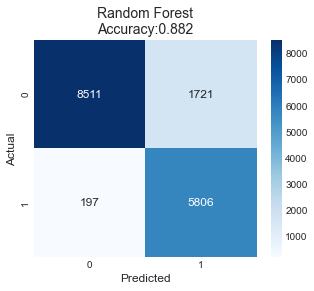

In [126]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="Blues", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.savefig("Confusion Matrix.png")
plt.show()

In [91]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test,y_pred)}')
print(f'Recall Score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8818601786264244
Precision Score: 0.7713564501129268
Recall Score: 0.9671830751291021


# Feature Importance

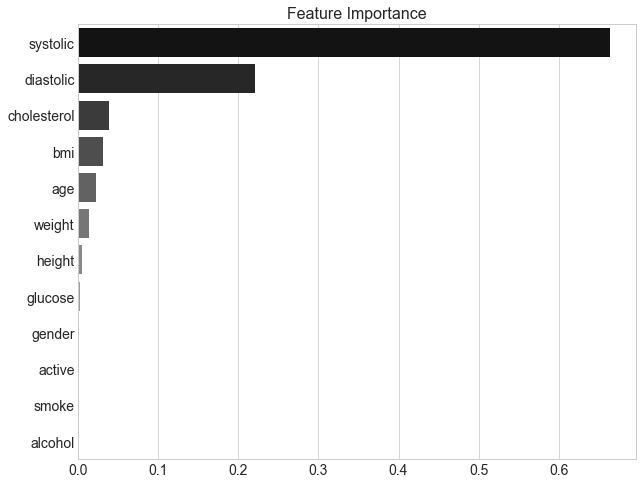

In [92]:
data2 = df.copy()
data2.drop("target", axis=1, inplace=True)

feature_names = list(data2.columns.values)
feature_imp = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)

plt.figure(figsize = (10,8))
sns.barplot(x = feature_imp, y = feature_imp.index, palette="binary_r")
plt.title("Feature Importance", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig("Feature Importance.png") 
plt.show()

#### Model Inference

In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16235 entries, 50855 to 68869
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          16235 non-null  int32  
 1   gender       16235 non-null  int32  
 2   height       16235 non-null  int64  
 3   weight       16235 non-null  float64
 4   systolic     16235 non-null  int64  
 5   diastolic    16235 non-null  int64  
 6   cholesterol  16235 non-null  int64  
 7   glucose      16235 non-null  int64  
 8   smoke        16235 non-null  int64  
 9   alcohol      16235 non-null  int64  
 10  active       16235 non-null  int64  
 11  bmi          16235 non-null  float64
 12  target       16235 non-null  int64  
dtypes: float64(2), int32(2), int64(9)
memory usage: 2.1 MB


In [94]:
df_test.tail(5)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,bmi,target
22698,56,1,166,64.0,140,80,1,1,0,0,1,23.2,1
27699,40,1,171,65.0,110,70,1,1,1,0,1,22.2,0
21623,56,0,168,58.0,120,80,1,1,0,0,1,20.5,0
23691,39,1,168,109.0,150,100,1,2,0,1,1,38.6,1
68869,60,1,172,80.0,130,90,1,1,0,0,1,27.0,0


In [114]:
age = int(input("Age: "))
gender = int(input("Gender:"))
height = float(input("height:"))
weight = float(input("weight:"))
systolic = int(input("systolic:"))
diastolic = int(input("diastolic:"))
cholesterol = int(input("cholesterol:"))
glucose = int(input("glucose:"))
smoke = int(input("smoke:"))
alcohol = int(input("alcohol:"))
active = int(input("active:"))
bmi = float(input("bmi:"))

val = [age, gender, height, weight, systolic, diastolic, cholesterol, glucose, smoke, alcohol, active, bmi]
val = scaler_.transform([val])

print("Input Values:", val)

val_predict = model.predict(val)

if val_predict == 1:
    print("Pasien memiliki risiko penyakit Kardiovaskular")
else:
    print("Pasien tidak memiliki risiko penyakit Kardiovaskular")

Age: 40
Gender:1
height:171
weight:65
systolic:110
diastolic:70
cholesterol:1
glucose:1
smoke:1
alcohol:0
active:1
bmi:22.2
Input Values: [[-1.9035974   1.33775992  0.81803856 -0.64178424 -1.07233904 -1.23537596
  -0.52857346 -0.38507277  3.13266474 -0.24500038  0.48082144 -1.08670195]]
Pasien tidak memiliki risiko penyakit Kardiovaskular


# Save and Load Models

In [96]:
# model
pickle_file_dir = open("model.pkl", "wb")
pickle.dump(model, pickle_file_dir)
pickle_file_dir.close()

# scaler
pickle_file_dir_scaler = open("scaler.pkl", "wb")
pickle.dump(scaler_, pickle_file_dir_scaler)
pickle_file_dir_scaler.close()

# Random Sample

In [97]:
data_sample = data.sample(frac = .05, random_state=1)

In [98]:
data_sample

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,bmi
24385,64,0,157,59.0,150,90,3,3,0,0,1,0,23.9
11543,64,0,168,64.0,120,80,1,1,0,0,1,0,22.7
28323,64,0,154,56.0,120,80,3,1,0,0,1,0,23.6
15974,48,0,165,72.0,160,80,3,3,0,0,0,1,26.4
15635,60,0,155,69.0,130,90,2,1,0,0,1,1,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58447,58,1,164,84.0,130,80,1,3,0,0,1,0,31.2
26926,58,0,176,88.0,130,90,2,1,0,1,1,1,28.4
59858,52,1,176,67.0,130,90,1,1,1,1,1,0,21.6
9300,60,1,175,64.0,110,70,1,1,0,0,0,0,20.9


In [99]:
x_data_sample  = data_sample.drop("target", axis=1)

In [100]:
scaler_sample = StandardScaler()
data_scaled_sample = scaler_sample.fit_transform(x_data_sample)
data_scaled_sample

array([[ 1.6028053 , -0.73076235, -0.92647485, ..., -0.25317489,
         0.48830721, -0.70254364],
       [ 1.6028053 , -0.73076235,  0.45786582, ..., -0.25317489,
         0.48830721, -0.96873342],
       [ 1.6028053 , -0.73076235, -1.30402231, ..., -0.25317489,
         0.48830721, -0.76909108],
       ...,
       [-0.13933005,  1.36843395,  1.46465903, ...,  3.94983886,
         0.48830721, -1.21274072],
       [ 1.02209352,  1.36843395,  1.33880988, ..., -0.25317489,
        -2.0478911 , -1.3680181 ],
       [ 1.31244941, -0.73076235,  0.20616751, ..., -0.25317489,
         0.48830721,  0.42876295]])

In [101]:
df_sample_scaled = pd.DataFrame(data_scaled_sample, columns=columns)

In [102]:
df_sample_scaled

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alco,active,bmi
0,1.602805,-0.730762,-0.926475,-1.087026,1.243490,0.847985,2.421243,3.185214,-0.316934,-0.253175,0.488307,-0.702544
1,1.602805,-0.730762,0.457866,-0.702030,-0.513018,-0.184710,-0.542740,-0.384547,-0.316934,-0.253175,0.488307,-0.968733
2,1.602805,-0.730762,-1.304022,-1.318024,-0.513018,-0.184710,2.421243,-0.384547,-0.316934,-0.253175,0.488307,-0.769091
3,-0.720042,-0.730762,0.080318,-0.086037,1.828993,-0.184710,2.421243,3.185214,-0.316934,-0.253175,-2.047891,-0.147982
4,1.022094,-0.730762,-1.178173,-0.317034,0.072485,0.847985,0.939252,-0.384547,-0.316934,-0.253175,0.488307,0.362216
...,...,...,...,...,...,...,...,...,...,...,...,...
2701,0.731738,1.368434,-0.045531,0.837954,0.072485,-0.184710,-0.542740,3.185214,-0.316934,-0.253175,0.488307,0.916778
2702,0.731738,-0.730762,1.464659,1.145951,0.072485,0.847985,0.939252,-0.384547,-0.316934,3.949839,0.488307,0.295668
2703,-0.139330,1.368434,1.464659,-0.471033,0.072485,0.847985,-0.542740,-0.384547,3.155228,3.949839,0.488307,-1.212741
2704,1.022094,1.368434,1.338810,-0.702030,-1.098521,-1.217404,-0.542740,-0.384547,-0.316934,-0.253175,-2.047891,-1.368018


In [103]:
X_s= df_sample_scaled
y_s = data_sample["target"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size = 0.3, random_state = 42)

In [104]:
model_rf = RandomForestClassifier(n_estimators=1800, max_features= "auto", random_state=1, min_samples_leaf=50, min_samples_split=2)

In [105]:
model_rf.fit(X_train_s, y_train_s)
y_pred_s_rf = model_rf.predict(X_test_s)

In [106]:
print(accuracy_score(y_test_s, y_pred_s_rf))

0.8719211822660099


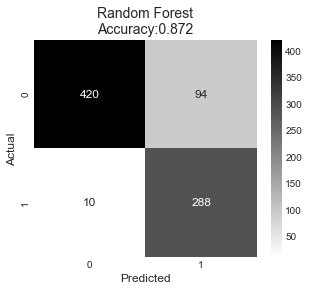

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       514
           1       0.75      0.97      0.85       298

    accuracy                           0.87       812
   macro avg       0.87      0.89      0.87       812
weighted avg       0.89      0.87      0.87       812

Accuracy Score: 0.8719211822660099
Precision Score: 0.7539267015706806
Recall Score: 0.9664429530201343


In [107]:
# Create a confusion Matrix
cm = confusion_matrix(y_test_s, y_pred_s_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="binary", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test_s, y_pred_s_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test_s, y_pred_s_rf))

print(f'Accuracy Score: {accuracy_score(y_test_s, y_pred_s_rf)}')
print(f'Precision Score: {precision_score(y_test_s,y_pred_s_rf)}')
print(f'Recall Score: {recall_score(y_test_s,y_pred_s_rf)}')

---